<a href="https://colab.research.google.com/github/Vardhan77/DeepLearningWithEVA/blob/master/Project_eva1_p2/LSTM_EVA2_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

Using TensorFlow backend.


In [6]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 2s 0us/step


In [7]:
print(x_train.shape)

(25000, 20)


In [26]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.6675 - acc: 0.6266 - val_loss: 0.6162 - val_acc: 0.6956
Epoch 2/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.5406 - acc: 0.7504 - val_loss: 0.5257 - val_acc: 0.7314
Epoch 3/10
20000/20000 [==============================] -

In [12]:
!wget http://mng.bz/0tIo

--2020-01-24 18:47:46--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-01-24 18:47:46--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
ERROR: cannot verify mng.bz's certificate, issued by ‘CN=Go Daddy Secure Certificate Authority - G2,OU=http://certs.godaddy.com/repository/,O=GoDaddy.com\\, Inc.,L=Scottsdale,ST=Arizona,C=US’:
  Unable to locally verify the issuer's authority.
To connect to mng.bz insecurely, use `--no-check-certificate'.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
imdb_dir = '/content/drive/My Drive/MNIST/aclImdb.zip'

In [0]:
from zipfile import ZipFile 
import zipfile
#os.chdir('/')
zip_ref = zipfile.ZipFile("/content/drive/My Drive/MNIST/aclImdb.zip", 'r')
#os.mkdir("dataset")
zip_ref.extractall("/dataset")
zip_ref.close()

In [0]:
import os
imdb_dir = '/dataset/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 100
training_samples = 8000
validation_samples = 100000
max_words = 100000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.layers import Input, Dense,Embedding,Flatten
from tensorflow.python.keras.models import Sequential

In [6]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [7]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-01-24 23:51:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-24 23:51:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-24 23:51:03--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [21]:
!pip install pyunpack
!pip install patool

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=15a32606a1baccb3f7029940a5a157109be8d76af3efe61e126d401cb8989090
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack
     |████████████████████████████████| 81kB 2.6MB/s 


In [0]:
import os

import numpy as np

In [0]:
from zipfile import ZipFile 
import zipfile
#os.chdir('/')
zip_ref = zipfile.ZipFile("/content/glove.6B.zip", 'r')
os.mkdir("dataset")
zip_ref.extractall("/content/dataset/")
zip_ref.close()

In [10]:
glove_dir = '/content/dataset/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 200
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          20000000  
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 20,640,065
Trainable params: 20,640,065
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [14]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 17000 samples
Epoch 1/10
8000/8000 [==============================] - 4s 510us/step - loss: 0.6983 - acc: 0.6301 - val_loss: 0.6498 - val_acc: 0.6352
Epoch 2/10
8000/8000 [==============================] - 4s 461us/step - loss: 0.4879 - acc: 0.7650 - val_loss: 0.5810 - val_acc: 0.7061
Epoch 3/10
8000/8000 [==============================] - 4s 464us/step - loss: 0.3794 - acc: 0.8303 - val_loss: 0.5983 - val_acc: 0.7184
Epoch 4/10
8000/8000 [==============================] - 4s 469us/step - loss: 0.2861 - acc: 0.8832 - val_loss: 0.6303 - val_acc: 0.7171
Epoch 5/10
8000/8000 [==============================] - 4s 471us/step - loss: 0.2113 - acc: 0.9178 - val_loss: 0.7135 - val_acc: 0.7169
Epoch 6/10
8000/8000 [==============================] - 4s 465us/step - loss: 0.1352 - acc: 0.9520 - val_loss: 0.7796 - val_acc: 0.7089
Epoch 7/10
8000/8000 [===============

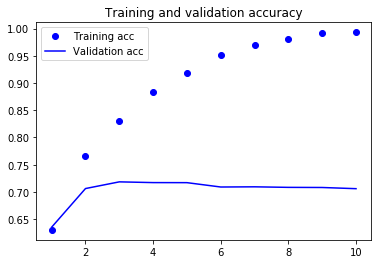

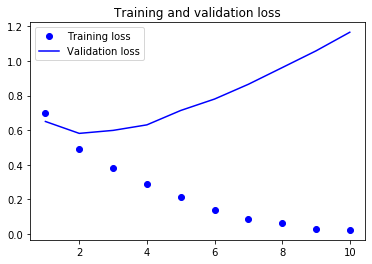

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()